# Handling data with high dimension and small sample size.

####  Generally we think that higher dimension is better for machine learning model and that can be justified by the maths uesd behind some of the models, let's say linear model (regression or classification) uses linear algebra of equation : y = ax1+bx2+cx3.... that means more the number of features (independent variables) better the prediction(dependent variable).

#### But the above mathematical assumption is only true if number of samples (sample size = n) is much greater than dimensions(=m), no matter how large dimensions we have. That is it has to satisfy the inequality n>>m.

#### Let's understand with example - if a dataset has 5000 dimensions (independent features) but sample size is 1000000 then this dataset is not called to have high dimensions. On the other side if dimensions are 200 but only we have 20 sample size then it is said to be high dimensional data. Such data is not good fit for machine learning algorithm as they will overfit. That means they will give good result over traning data but poor performance over validation data.

#### There are many ways to handle such data with high dimension by reducing dimensions or increasing smaple size of combining both of them.
      These are some dimensionality reduction techniques
     1. PCA (principle component analysis).
     2. t-SNE (t-distributed stochastic neighbor embedding)
     3. UMAP (uniform maniforld approximation and projection)
     3. Using statical method like - correlation functions.
     4. SVD (single value decomposition)
     
###### lets implement the following using actuall data from kagel.
     

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
## Here I am using a data from kagel.
df = pd.read_csv('Android_Malware_Benign.csv')
df

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Label
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,Malware
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,Malware
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,Malware
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malware
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,Benign
4460,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,Benign
4461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Benign
4462,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,Benign


In [3]:
df.describe()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,...,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.0
mean,0.000896,0.000896,0.004928,0.083333,0.006944,0.087814,0.022849,0.023746,0.000224,0.596326,...,0.003808,0.025314,0.004704,0.028674,0.029570,0.956989,0.020833,0.020385,0.132392,0.0
std,0.029924,0.029924,0.070037,0.276416,0.083053,0.283055,0.149440,0.152272,0.014967,0.490689,...,0.061600,0.157094,0.068434,0.166907,0.169416,0.202904,0.142842,0.141330,0.338955,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Columns: 328 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: int64(327), object(1)
memory usage: 11.2+ MB


##### From the above information we can say that the given dataset is not high dimensional as number of entries is much higher than that of  dimensions. However we will apply some of the techniques to reduce the dimension as far as possible and will see if the model performance improved.

In [5]:
# Seperating dependent and independent features.
df_label = df['Label']
df_features = df.drop('Label', axis=1)
df_features

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4460,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4462,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Converting df_label from string to int
def convert_string_int(x):
    if x == 'Malware':
        return 1
    else:
        return 0
        
df_label.value_counts()

Label
Malware    2533
Benign     1931
Name: count, dtype: int64

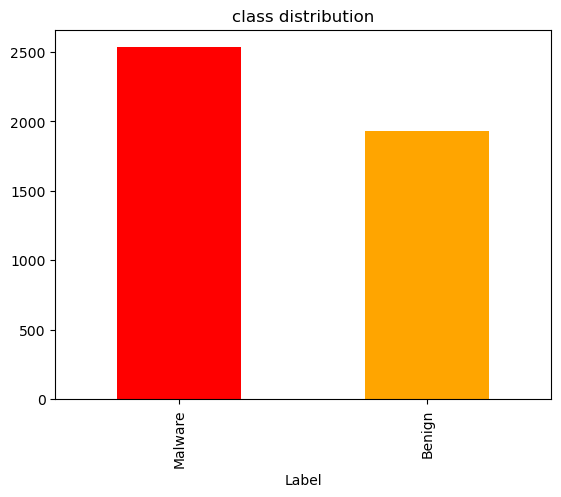

In [7]:
# plotting the graph
label_counts = df_label.value_counts()
label_counts.plot(kind='bar', color=['red','orange'])
plt.title('class distribution')
plt.show()

In [8]:
# from above we can conclude that data is not imbalance.
# lets convert the label into 1 and 0 for malware and benign resp
df_label = df_label.map(convert_string_int)
df_label

0       1
1       1
2       1
3       1
4       1
       ..
4459    0
4460    0
4461    0
4462    0
4463    0
Name: Label, Length: 4464, dtype: int64

## Let's train a model and predict the value over the raw data without doing any preprocessing, i.e. dimensionality reduction. This will set the bench mark of model for further improvement.

In [9]:
# split the train and test with 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3571, 327) (3571,)
(893, 327) (893,)


In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
print(acc)

0.6864501679731243


#### 68.64% is the bench marck of  the model with raw data
#### Let's improve the accuracy goinging through different technique one by one

#### Implementing Statical relationship - check for correlation and set the threshold to 0.9, if correlation among the features are greater than 0.9 remove those features except one

In [11]:
columns = df_features.columns
print(len(columns))

327


In [12]:
# define a function to read the correlations and drop using given threshold
def drop_columns_corr(df, val=0.9):
    
    # create a matrix of correlations
    corr_matrix = df.corr().abs()
    
    # create a upper tringle excluding diagonal to keep the one of the features
    upper_tringle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # create list of  columns which are less correlated to each other
    drop_col = [col for col in upper_tringle.columns if any(upper_tringle[col] >= val)]
    df = df.drop(drop_col, axis=1)
    
    return df # returns dataframe with less correlated features


In [13]:
df_corr_features = drop_columns_corr(df_features)
df_corr_features.shape

(4464, 211)

##### using correlation we will be able to drop 116 columns (they can be called redundant). Now lets train the same model to check if model performance has increased or not

In [14]:
# split the train and test with 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(df_corr_features, df_label, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)

nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
print(acc)

(3571, 211)
0.7054871220604704


#### From above comparision we can see model performance has increased from 68.64% to 70.54% . Thus dimensionality reduction help in model perfomance

## Let's implement the PCA a dimensionality reduction technique to check if model performance increases or not.

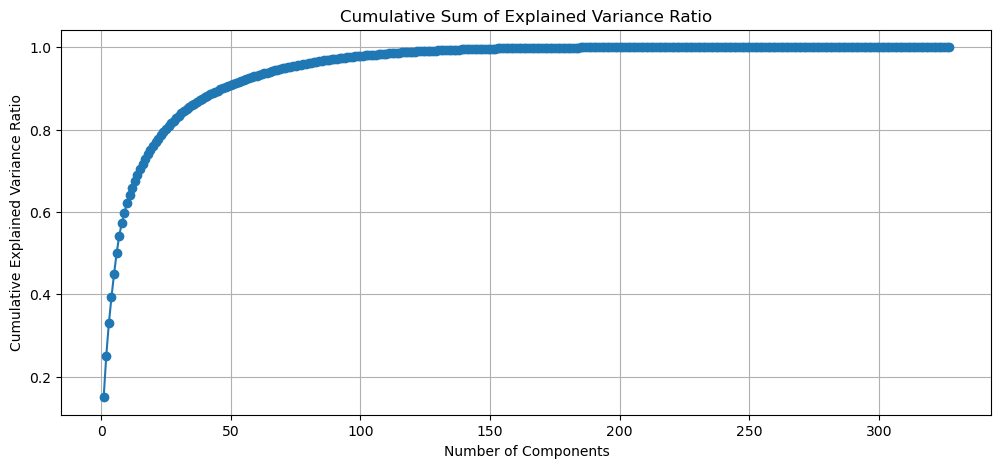

In [15]:
pca = PCA()
pca.fit(df_features)

# variance explained by each features
variance_explained = pca.explained_variance_ratio_

# getting cumulative sum and retain features that exlain upto 0.9 or 0.95
cummulative_var_exp = variance_explained.cumsum()

# plotting cummulative sum to check how much components explain upto 0.95 information
plt.figure(figsize=(12,5))
plt.plot(range(1, len(cummulative_var_exp)+1), cummulative_var_exp, marker='o')
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [16]:
#upto 99% of information is retained just by approx 120 featues
# finding the number of component(features)
n_components = (cummulative_var_exp <= 0.99).sum()+1
print('numner of features after PCA: ',n_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_features)

# creating new dataframe with only features getting from pca
columns = [f"PC{i+1}" for i in range(n_components)]
df_pca_features = pd.DataFrame(data=X_pca[:,:n_components], columns=columns)
df_pca_features.head()

numner of features after PCA:  124


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124
0,2.549618,-0.972885,-0.356789,0.053620,0.261463,-1.432369,-1.186883,0.565328,-0.415117,-0.542743,...,-0.010587,-0.010233,0.003657,0.014183,0.021907,0.001116,-0.003970,-0.005638,0.012882,0.005491
1,-0.177311,-0.284148,-0.017184,1.898282,0.798099,0.953197,0.561757,-0.838311,-0.175228,0.743774,...,0.101110,0.352360,0.031293,0.222557,0.247856,0.024707,-0.026906,-0.007842,-0.049609,-0.025766
2,-0.168391,0.096621,-0.757626,2.153956,-0.514072,-0.425886,0.436141,-0.666703,0.721499,0.176596,...,0.124789,0.364990,0.063302,0.232202,0.199314,-0.002249,-0.017228,0.034646,-0.051626,-0.000197
3,0.317155,-0.652959,0.555272,0.803363,0.657365,0.986869,-0.202575,-1.004051,0.181023,0.560838,...,-0.099973,-0.048201,0.156520,0.040754,-0.040408,-0.179579,-0.173245,0.144560,0.010916,0.146262
4,-1.866780,0.884654,0.088823,1.257934,1.319956,-0.937487,-0.004380,-0.253584,0.202838,0.393045,...,0.135924,0.372826,0.049031,0.232602,0.190633,0.019195,-0.017709,0.013496,-0.049530,-0.002564


In [17]:
# Only 124 features have 99% of information.
# split the train and test with 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(df_pca_features, df_label, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)

nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
print(acc)

(3571, 124)
0.7245240761478163


#### Thus we see after further reduction using PCA, model performance increased to 72.67%.

#### Implementing PCA on top of data_corr_features (data we after implementing correlation function)

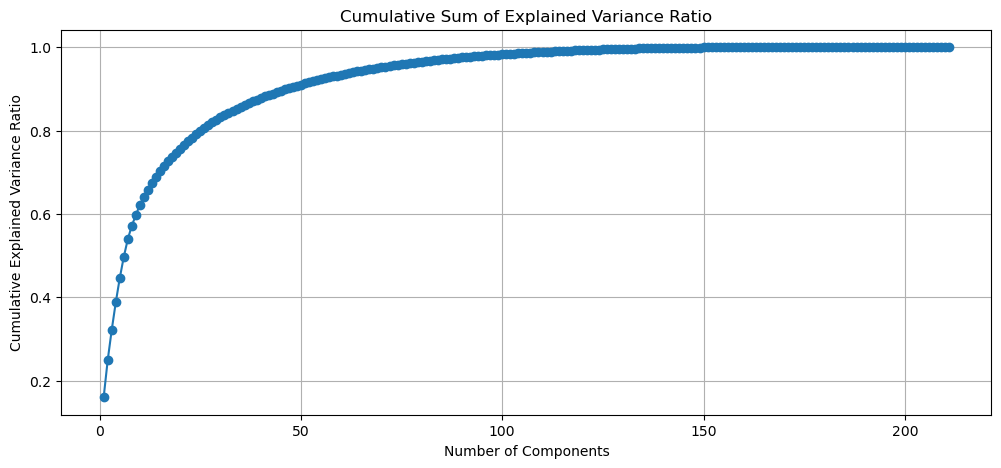

In [18]:
pca = PCA()
pca.fit(df_corr_features)

# variance explained by each features
variance_explained = pca.explained_variance_ratio_

# getting cumulative sum and retain features that exlain upto 0.9 or 0.95
cummulative_var_exp = variance_explained.cumsum()

# plotting cummulative sum to check how much components explain upto 0.95 information
plt.figure(figsize=(12,5))
plt.plot(range(1, len(cummulative_var_exp)+1), cummulative_var_exp, marker='o')
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [19]:
n_components = (cummulative_var_exp <= 0.99).sum()+1
print('numner of features after PCA: ',n_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_corr_features)

# creating new dataframe with only features getting from pca
columns = [f"PC{i+1}" for i in range(n_components)]
df_pca_features = pd.DataFrame(data=X_pca[:,:n_components], columns=columns)
df_pca_features.head()

numner of features after PCA:  113


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113
0,2.619559,-0.108071,0.060148,0.335874,0.023669,-1.792362,-0.613021,-0.527229,-0.356542,-0.510697,...,-0.003929,-0.001535,-0.014105,0.000995,0.013433,0.010315,-0.005801,-0.015846,-0.010023,-0.015791
1,-0.007571,0.615340,-0.686471,0.363908,1.516036,0.714366,0.595044,1.046462,-0.231828,0.367234,...,0.105492,0.150575,-0.124248,0.396800,0.400572,-0.286679,0.040028,-0.040146,-0.044610,-0.101668
2,-0.085911,-0.442071,-0.926107,1.719804,0.577706,0.006243,0.412106,0.643786,0.629820,-0.129112,...,0.099277,0.149536,-0.149339,0.364347,0.401307,-0.287508,0.037071,-0.032093,-0.043539,-0.114236
3,0.299602,0.910834,-0.429335,-0.086397,1.316644,0.743264,-0.077224,1.086207,-0.014085,0.151044,...,-0.291648,-0.031843,0.025873,-0.085738,0.062937,0.109849,0.117038,0.014914,-0.104372,0.039978
4,-1.953069,0.100984,0.777379,0.701503,1.123288,-0.833629,0.339250,0.468447,0.161072,0.188277,...,0.111675,0.140559,-0.148688,0.396510,0.408122,-0.289264,0.035636,-0.045109,-0.062792,-0.101071


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_pca_features, df_label, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape)

nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test, y_pred, normalize=True)
print(acc)

(3571, 113)
0.729003359462486


#### On applying PCA on data removing highly correlated features, PCA further reduce it to 113 features with 99% of information gain. And model performance further improved to 72.90%

### TSNE

In [21]:
# applying t-sne on top of original dataframe.

tsne = TSNE(random_state=42)
tsne.fit(df_features)

df_tsne_features = tsne.fit_transform(df_features)
tsne.embedding_

array([[ 64.67533  ,  12.420704 ],
       [ 17.078918 , -63.93493  ],
       [  2.309698 , -68.7567   ],
       ...,
       [  1.3677784,  20.553062 ],
       [ 14.473301 ,  26.8205   ],
       [ 14.460982 ,  26.818123 ]], dtype=float32)

In [22]:
print(sum(tsne.embedding_))

[  897.4658 -4985.8164]


### I have not run the below code for T-SNE as using "method"="barnes_hut" it throws error as it won't work for more than 4 n_components, and if ''method'=''exact' then it takes long time to run the code on my local system.

In [ ]:
# finding best n_components using loop functions

# max_components = df_features.shape[1]
# n_components = 0
# variance_retained = 0.0

# for n_comp in range(1, max_components):
#     tsne = TSNE(n_components=n_comp, random_state=42, method='exact')
#     tsne_df = tsne.fit_transform(df_features)
#     variance = sum(sum(tsne.embedding_))
    
#     if variance > variance_retained:
#         n_components = n_comp
#         variance_retained = variance
        
# print(n_components)